In [1]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data1 = pickle.load(open("2020060462814.mat_experiment_data_weights.pkl", "rb" ))
data2 = pickle.load(open("2020060462871.mat_experiment_data_weights.pkl", "rb" ))

In [6]:
#calcualte the excitatory/inhibitory weights proportaion
def get_p(data):
    data_len = len(data)
    b_all = []
    for i in range(1,data_len):
        w_sod = []
        for si in range(10):
            w_sod.append(data[str(i)]['w_sod_'+str(si)])

        w_sod = np.vstack([e for e in w_sod])                    
        x0 = np.mean(w_sod,axis = 0)
        b=x0[4:]
        b_all.extend(b)

    b_plus = np.sum([i for i in b_all if i >0])
    b_minus = np.sum([i for i in b_all if i <=0])
    return np.abs(b_plus)/(np.abs(b_plus)+np.abs(b_minus))
    
    
    
print('excitatory weights:'+str(get_p(data1)))
print('excitatory weights:'+str(get_p(data2)))

excitatory weights:0.3014838347088732
excitatory weights:0.45105684648291616


## draw neural network

In [9]:
def get_G(data,cmap,vamin, vmax):
    data_len = len(data)
    G = nx.DiGraph()
    for i in range(1,data_len):
        w_sod = []
        for si in range(10):
            w_sod.append(data[str(i)]['w_sod_'+str(si)])

        w_sod = np.vstack([e for e in w_sod])                    
        x0 = np.mean(w_sod,axis = 0)
        b=x0[4:]
        for j in range(data_len-1):
            G.add_edge(i+1, j+1, weight=b[j])   
    
    edge_list = [u for (u, v, d) in G.edges(data=True)]

    
    # edges
    pos = nx.circular_layout(G,center= None)
    weight_list = [d['weight'] for (u, v, d) in G.edges(data=True)]
    
    
    nodes = nx.draw_networkx_nodes(G,pos, node_size = 300,node_color = 'k',)
    edges = nx.draw_networkx_edges(G, pos, edge_vmin=vamin,edge_vmax=vmax,
                                   arrowsize=10, edge_color=weight_list,
                                   edge_cmap=cmap,
                                   connectionstyle='arc3,rad=0.2',
                                   width = 1*np.abs(weight_list))

    nx.draw_networkx_labels(G, pos, font_size=12,
                            font_color = 'white', font_family='sans-serif')

    return edges
    


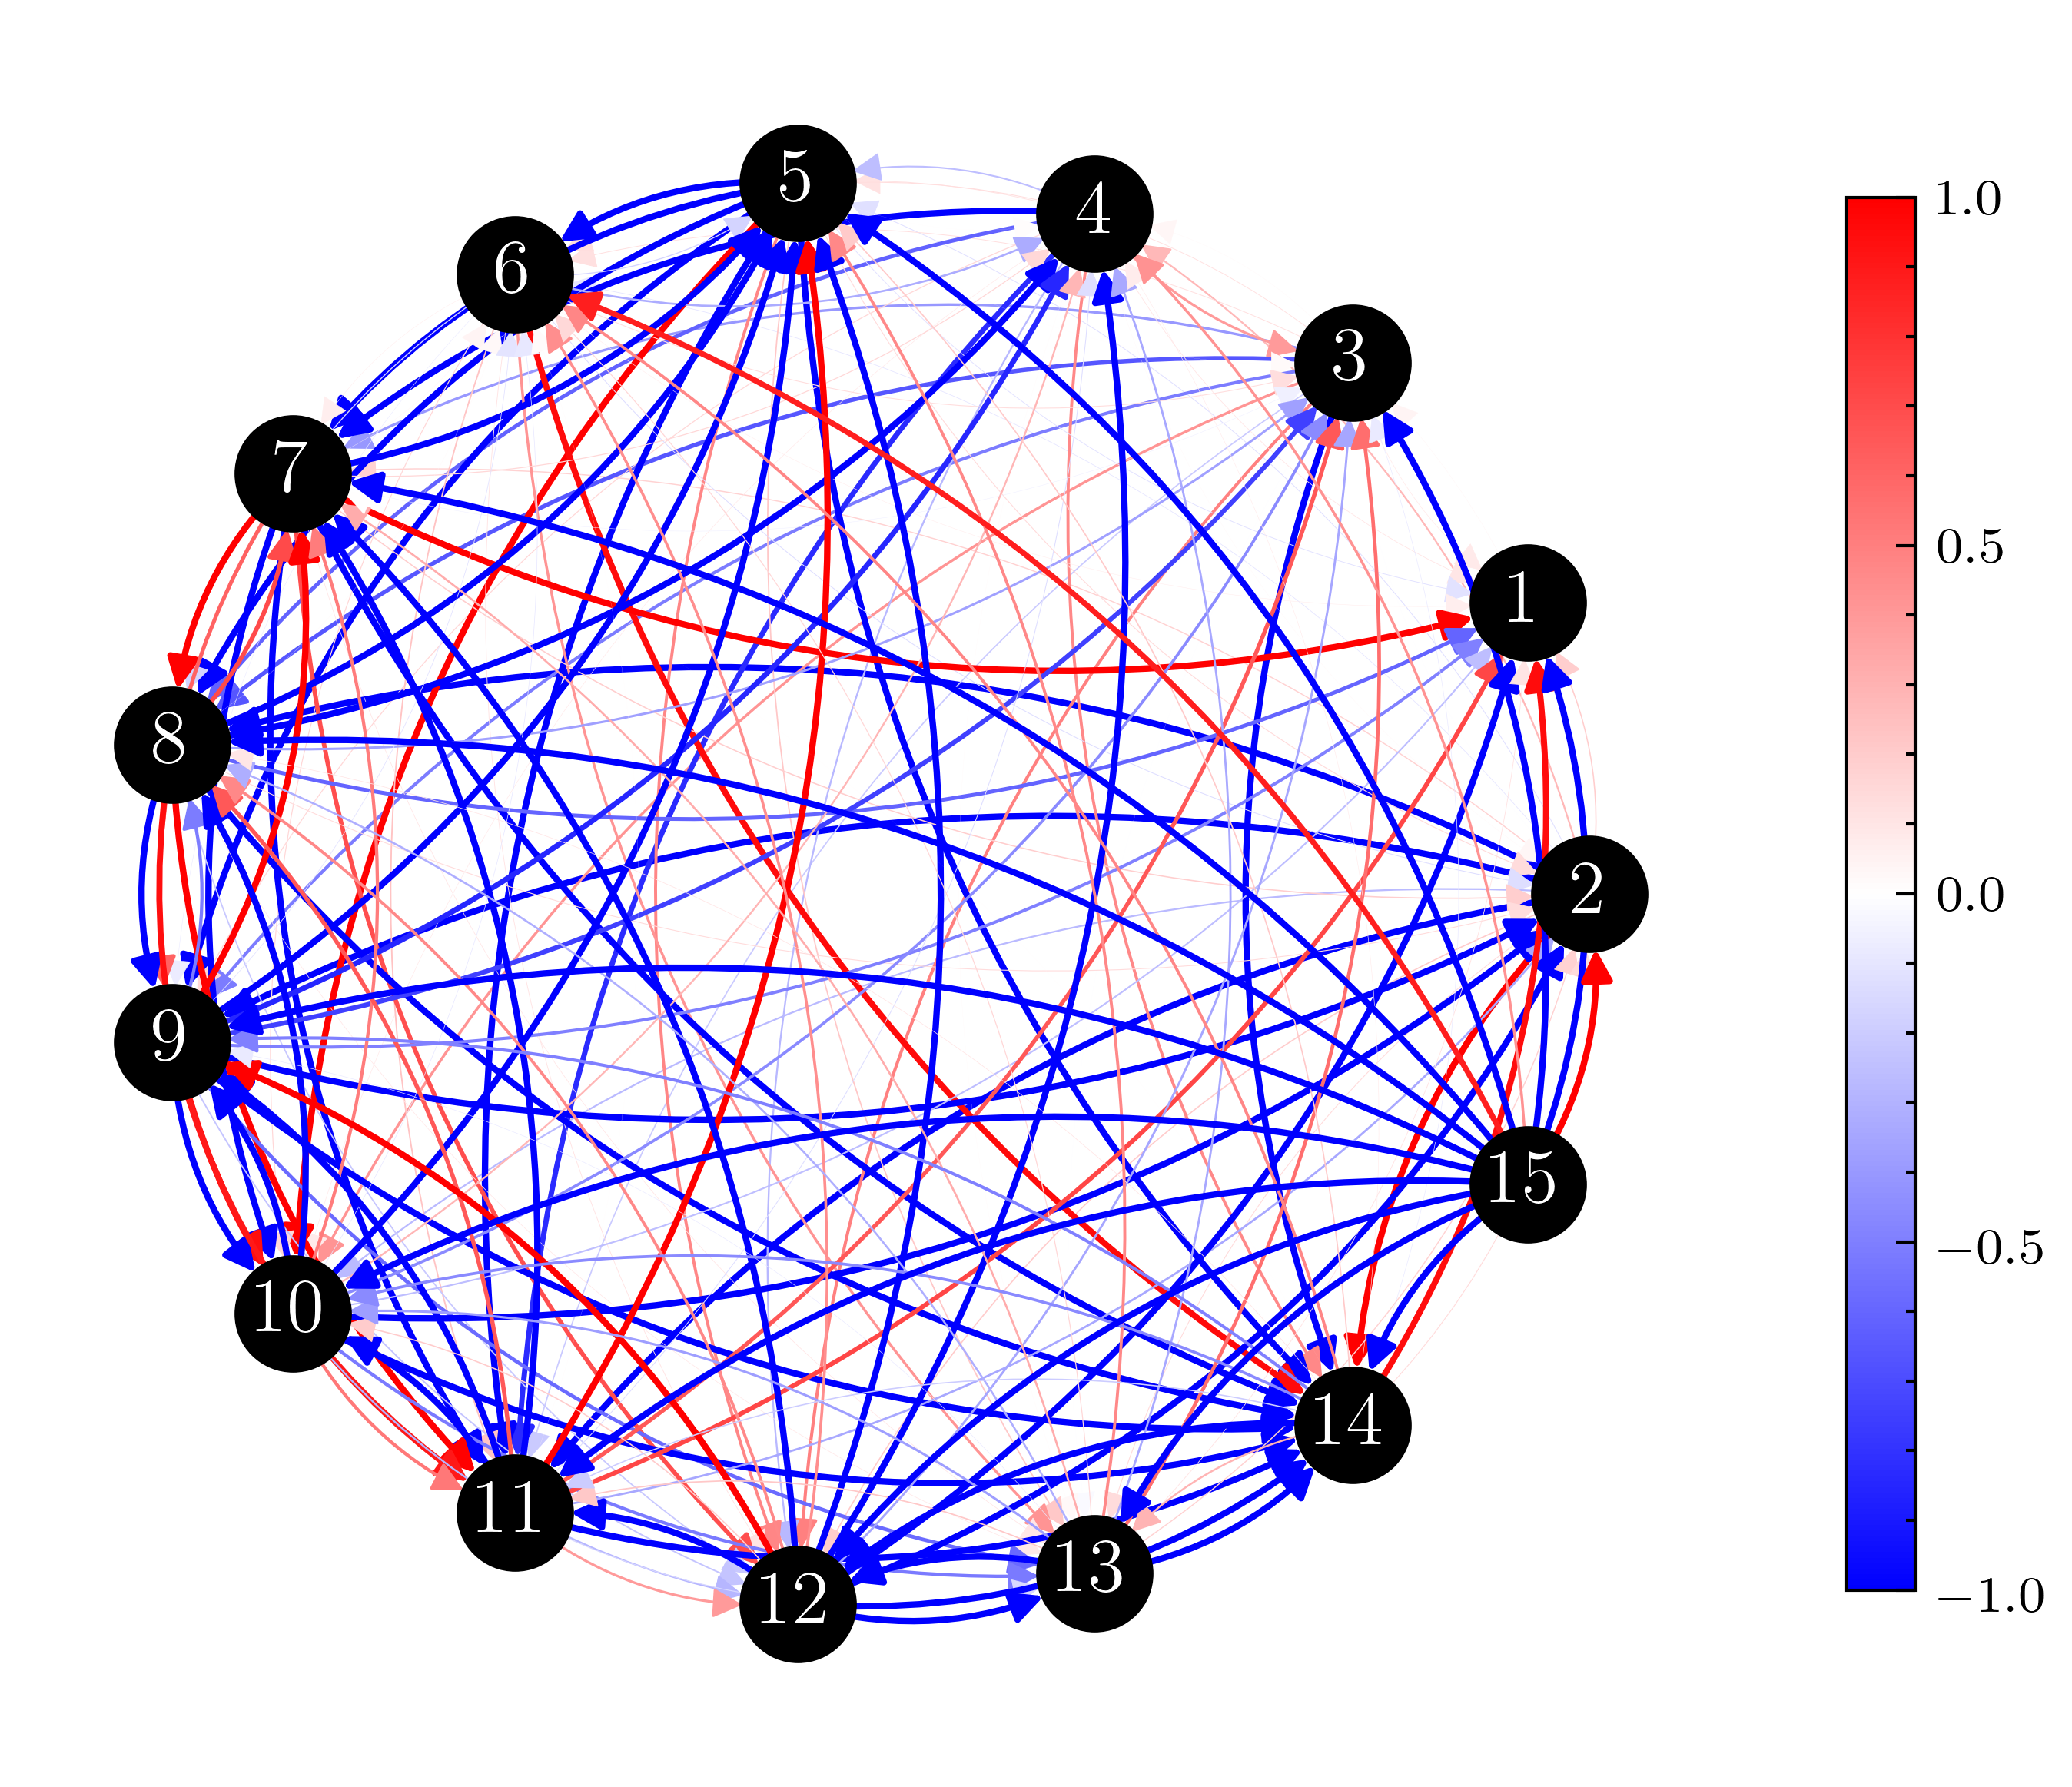

In [10]:
plt.style.use(['science','ieee'])
fig,ax = plt.subplots(figsize = (6,5))
cmap = plt.cm.bwr
vmin = -1
vmax = 1
edges = get_G(data1,cmap,vmin, vmax)    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,shrink=0.8, ticks = (-1,-0.5,0,0.5,1))

ax = plt.gca()
ax.set_axis_off()
plt.savefig('62814.png', bbox_inches='tight')

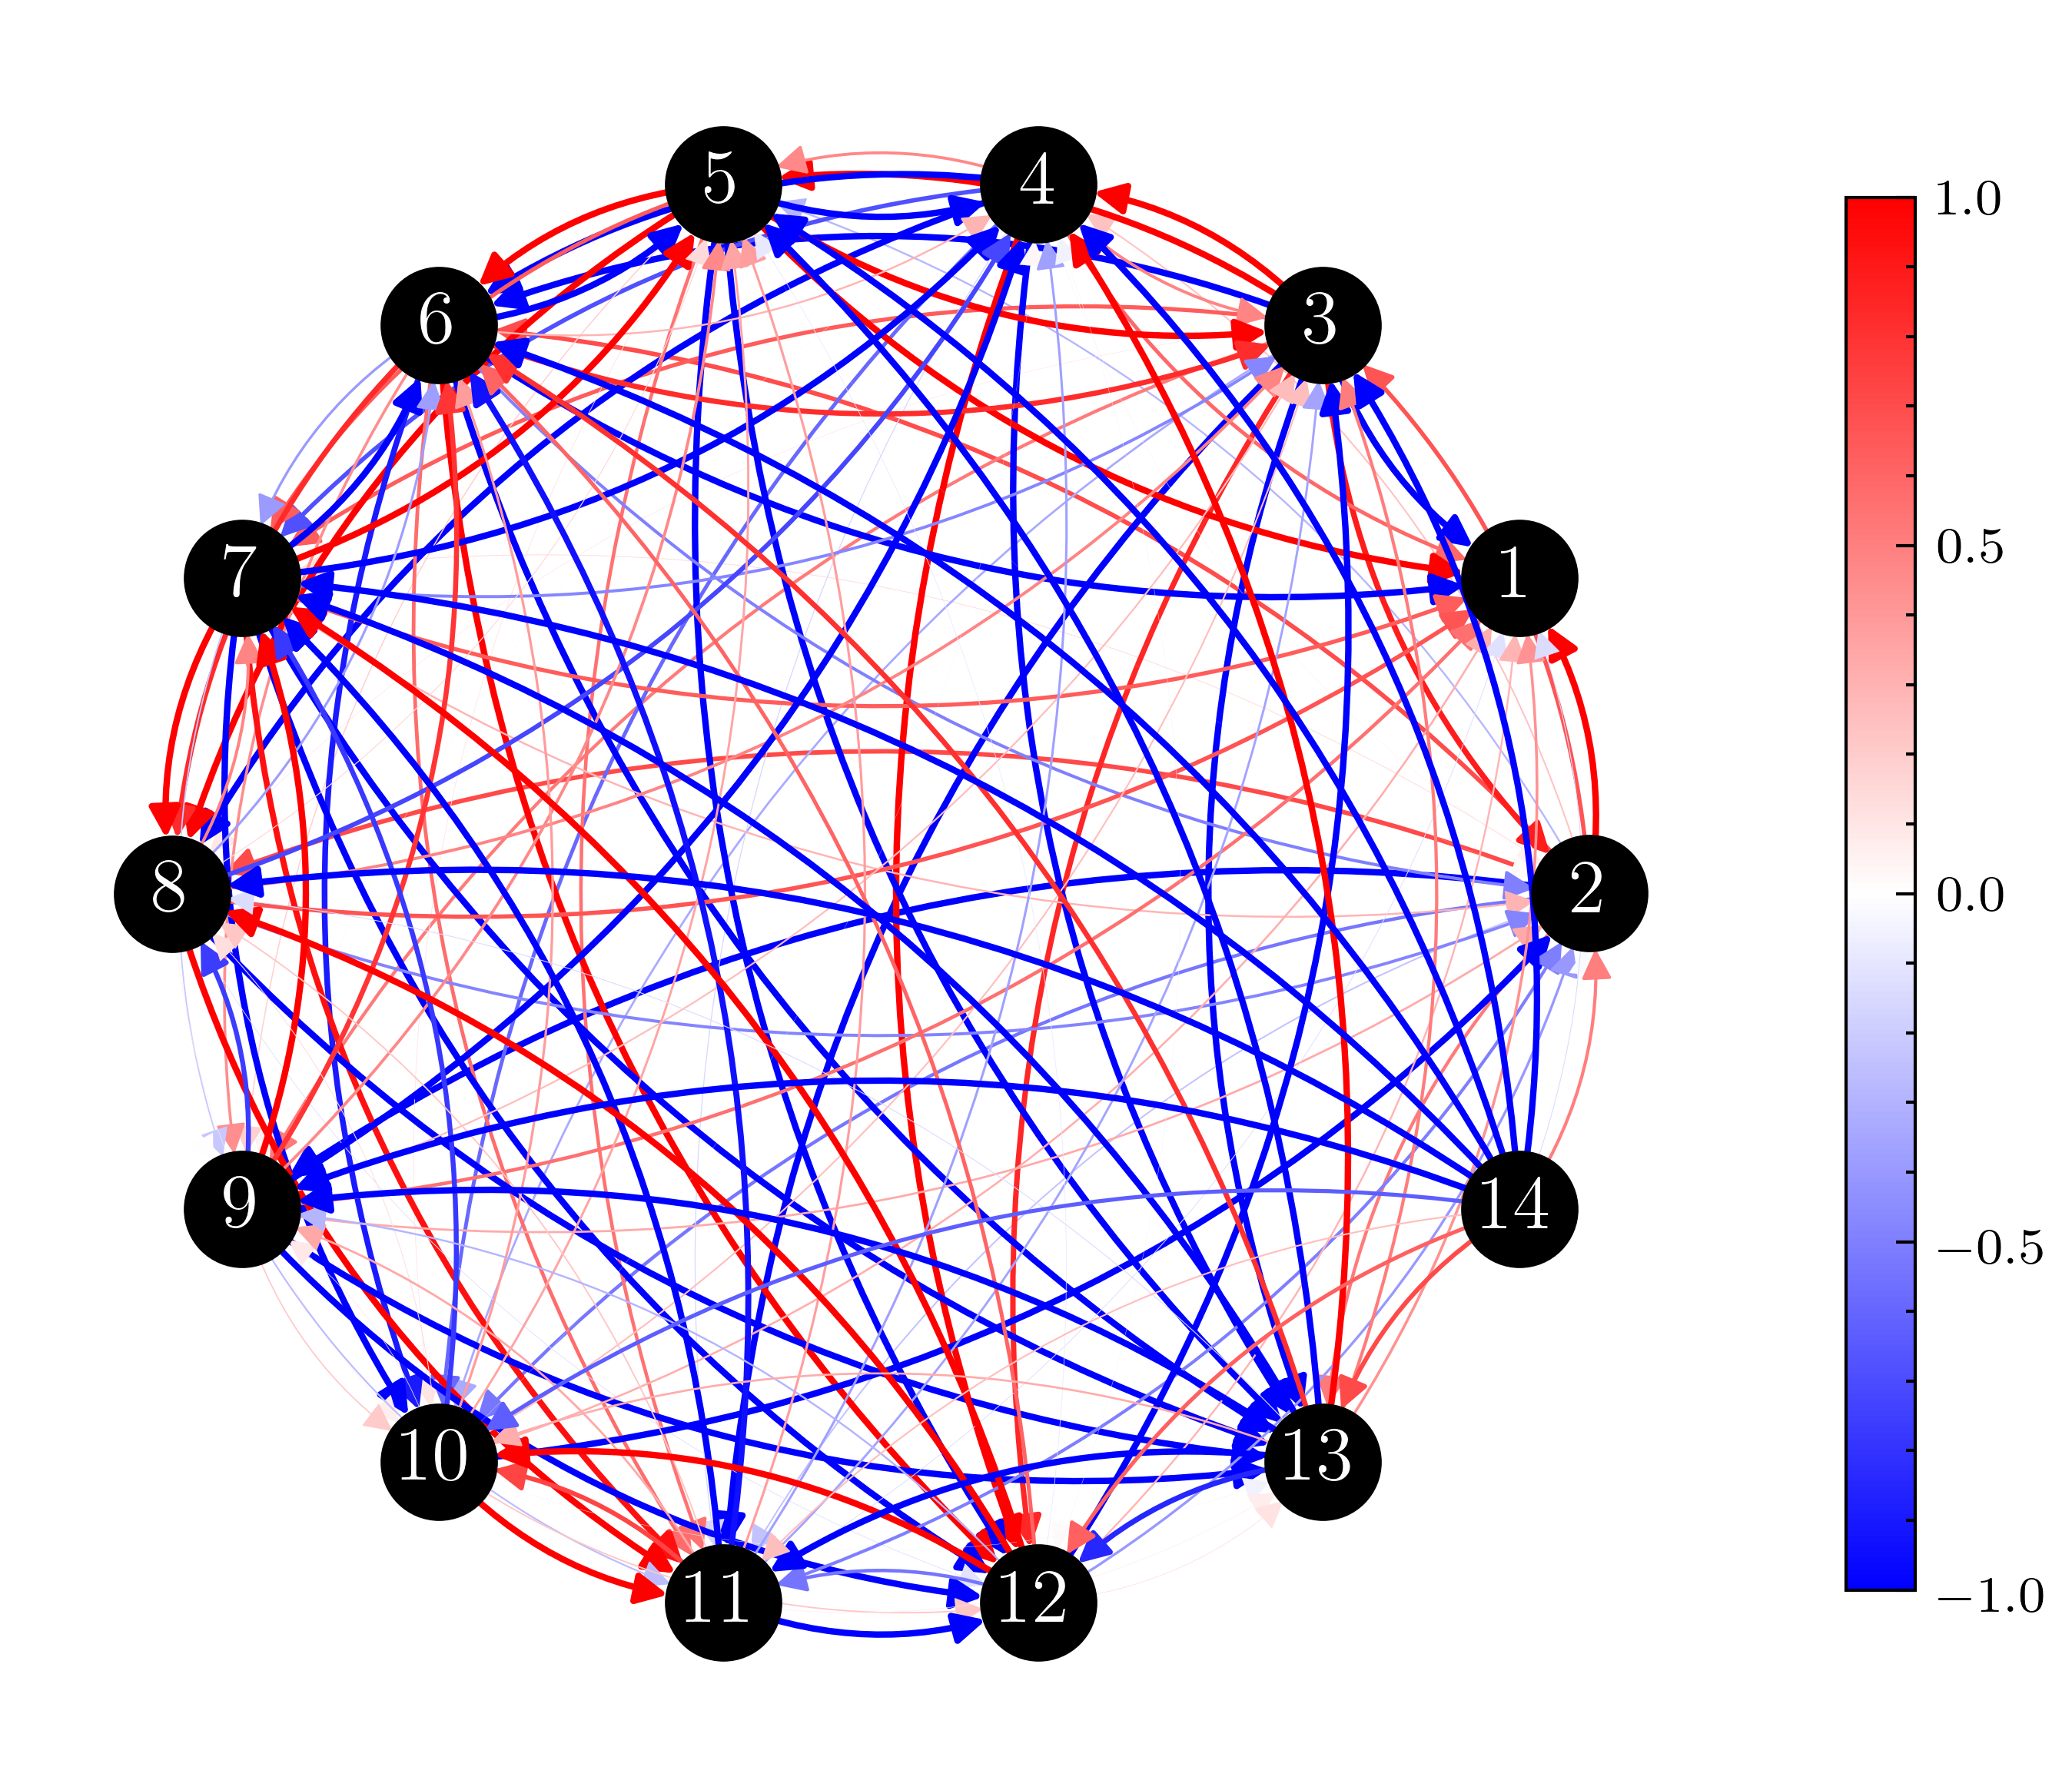

In [12]:
plt.style.use(['science','ieee'])
fig,ax = plt.subplots(figsize = (6,5))
cmap = plt.cm.bwr
vmin = -1
vmax = 1
edges = get_G(data2,cmap,vmin, vmax)    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,shrink=0.8, ticks = (-1,-0.5,0,0.5,1))

ax = plt.gca()
ax.set_axis_off()

plt.savefig('62871.png', bbox_inches='tight')